In [26]:
%matplotlib inline
from sklearn import datasets, svm, metrics
import brian2 as b2
import brian2tools as b2t
from scipy.special import softmax
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
#making brian2 compatabile with python environment
b2.prefs.codegen.target = 'numpy'

iris = datasets.load_iris()

In [28]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [29]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target  


df 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [30]:
#normalizing dataset
normalized=(iris.data-np.min(iris.data))/(np.max(iris.data)-np.min(iris.data))*50
normalized

array([[32.05128205, 21.79487179,  8.33333333,  0.64102564],
       [30.76923077, 18.58974359,  8.33333333,  0.64102564],
       [29.48717949, 19.87179487,  7.69230769,  0.64102564],
       [28.84615385, 19.23076923,  8.97435897,  0.64102564],
       [31.41025641, 22.43589744,  8.33333333,  0.64102564],
       [33.97435897, 24.35897436, 10.25641026,  1.92307692],
       [28.84615385, 21.15384615,  8.33333333,  1.28205128],
       [31.41025641, 21.15384615,  8.97435897,  0.64102564],
       [27.56410256, 17.94871795,  8.33333333,  0.64102564],
       [30.76923077, 19.23076923,  8.97435897,  0.        ],
       [33.97435897, 23.07692308,  8.97435897,  0.64102564],
       [30.12820513, 21.15384615,  9.61538462,  0.64102564],
       [30.12820513, 18.58974359,  8.33333333,  0.        ],
       [26.92307692, 18.58974359,  6.41025641,  0.        ],
       [36.53846154, 25.        ,  7.05128205,  0.64102564],
       [35.8974359 , 27.56410256,  8.97435897,  1.92307692],
       [33.97435897, 24.

In [31]:
normalized.shape

(150, 4)

In [32]:
print(normalized.max(),normalized.min())

50.0 0.0


In [33]:
# data = list(normalized.flatten()) 
# data

In [34]:
#flattening the dataset
data = [list(normalized[i].flatten()) for i in range(normalized.shape[0])]



data = [item for sublist in data for item in sublist]

print(data)

[32.05128205128205, 21.794871794871792, 8.333333333333332, 0.641025641025641, 30.76923076923077, 18.589743589743588, 8.333333333333332, 0.641025641025641, 29.48717948717949, 19.871794871794872, 7.692307692307692, 0.641025641025641, 28.846153846153843, 19.23076923076923, 8.974358974358973, 0.641025641025641, 31.41025641025641, 22.435897435897434, 8.333333333333332, 0.641025641025641, 33.97435897435898, 24.358974358974354, 10.256410256410255, 1.9230769230769231, 28.846153846153843, 21.15384615384615, 8.333333333333332, 1.282051282051282, 31.41025641025641, 21.15384615384615, 8.974358974358973, 0.641025641025641, 27.564102564102566, 17.948717948717945, 8.333333333333332, 0.641025641025641, 30.76923076923077, 19.23076923076923, 8.974358974358973, 0.0, 33.97435897435898, 23.076923076923077, 8.974358974358973, 0.641025641025641, 30.128205128205128, 21.15384615384615, 9.615384615384615, 0.641025641025641, 30.128205128205128, 18.589743589743588, 8.333333333333332, 0.0, 26.923076923076923, 18.5

In [35]:
len(data)

600

In [36]:
#converting the list into spike trains
stimulus = b2.TimedArray(data,dt=b2.defaultclock.dt) 

In [37]:
duration=b2.defaultclock.dt*len(data)
duration

60. * msecond

In [38]:
#stdp
start=time.time()

b2.start_scope()
taupre=20*b2.ms
taupost=15*b2.ms
wmax=100
Apre=0.01
Apost=-Apre*taupre/taupost*1.05
tau = 5*b2.ms

#applying the LIF model
eqs = '''
I = stimulus(t) : 1
dv/dt = (I-v)/tau + xi*(tau**-0.5): 1 
x : 1
'''
#defining the neuron group
G=b2.NeuronGroup(100,eqs,threshold='v>5',method='euler',reset='v=0',refractory='1*ms')
G.x='20*i'

#defining stdp rules
synapse_eqs='''
w:1
dapre/dt=-apre/taupre : 1(clock-driven)
dapost/dt=-apost/taupost : 1(clock-driven)
'''
on_pre_update='''
v_post+=w
apre+=Apre
w=clip(w+apost,0,wmax)
'''
on_post_update='''
apost+=Apost
w=clip(w+apre,0,wmax)
'''


In [39]:
#creating synapses
S=b2.Synapses(G,G,synapse_eqs,on_pre=on_pre_update,on_post=on_post_update,method='linear')

In [40]:
S.connect(condition='i!=j and abs(x_pre-x_post)<200',p='exp(-(x_pre-x_post)**2/((100.0)**2.0))')
#defining monitors for visualizing results
M=b2.StateMonitor(S,['w','apre','apost'],record=True)
Mv=b2.StateMonitor(G,'v',record=[1])
Mv1=b2.StateMonitor(G,'v',record=[2])
spm=b2.SpikeMonitor(G)
b2.run(60*b2.ms,report='text')
end=time.time()

Starting simulation at t=0. s for a duration of 60. ms
60. ms (100%) simulated in < 1s


<Axes: xlabel='source neuron index', ylabel='target neuron index'>

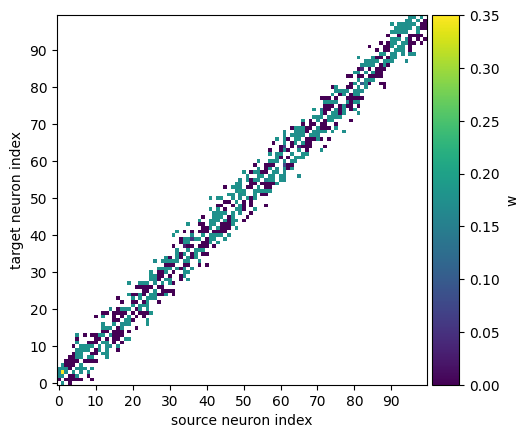

In [41]:
b2t.brian_plot(S.w)

In [42]:
#printing the weight array
print(len(S.w))
print(max(S.w))
S.w

734
0.3500066575342904


<synapses_1.w: array([0.        , 0.16809763, 0.16394728, 0.16476907, 0.17582559,
       0.17494865, 0.35000666, 0.17148444, 0.17582559, 0.        ,
       0.17088215, 0.1717387 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.18112621, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.1747862 , 0.1713252 , 0.        , 0.17304705, 0.17391445,
       0.17304705, 0.17566232, 0.        , 0.17566232, 0.        ,
       0.17615793, 0.17704092, 0.18152273, 0.17882021, 0.17971655,
       0.17882021, 0.17792834, 0.17735301, 0.        , 0.17913543,
       0.17824199, 0.        , 0.        , 0.17726373, 0.        ,
       0.17994272, 0.17994272, 0.17904526, 0.        , 0.        ,
       0.17907231, 0.        , 0.18087201, 0.        , 0.17996991,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.  

Text(0.5, 0, 'Time(ms)')

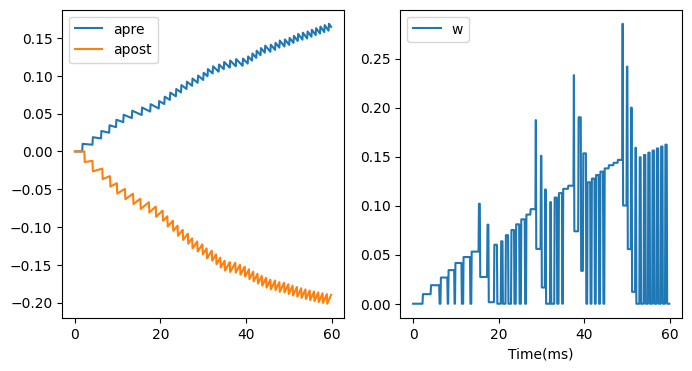

In [43]:
#plotting the changes in synapses and their affect on weights
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(M.t/b2.ms,M.apre[0],label='apre')
plt.plot(M.t/b2.ms,M.apost[0],label='apost')
plt.legend(loc='best')
plt.subplot(122)
plt.plot(M.t/b2.ms,M.w[0],label='w')
plt.legend(loc='best')
plt.xlabel('Time(ms)')

Text(0.5, 0, 'Time(ms)')

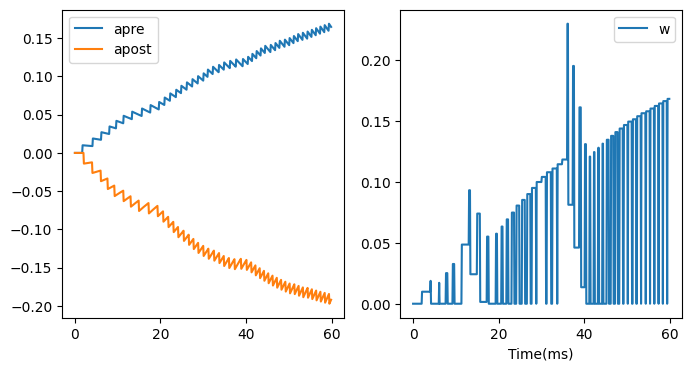

In [44]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(M.t/b2.ms,M.apre[1],label='apre')
plt.plot(M.t/b2.ms,M.apost[1],label='apost')
plt.legend(loc='best')
plt.subplot(122)
plt.plot(M.t/b2.ms,M.w[1],label='w')
plt.legend(loc='best')
plt.xlabel('Time(ms)')

Text(0.5, 0, 'Time(ms)')

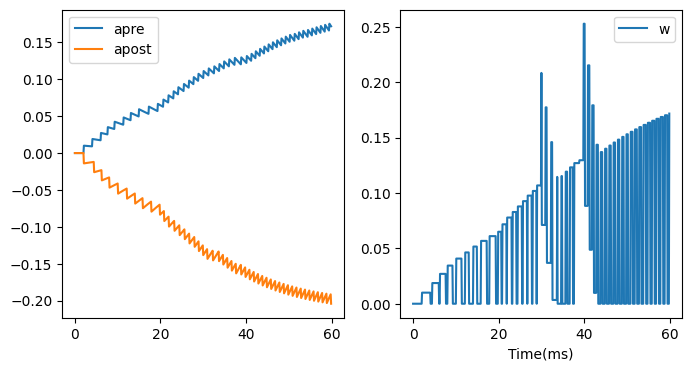

In [45]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(M.t/b2.ms,M.apre[11],label='apre')
plt.plot(M.t/b2.ms,M.apost[11],label='apost')
plt.legend(loc='best')
plt.subplot(122)
plt.plot(M.t/b2.ms,M.w[11],label='w')
plt.legend(loc='best')
plt.xlabel('Time(ms)')

<Axes: xlabel='time (ms)', ylabel='neuron index'>

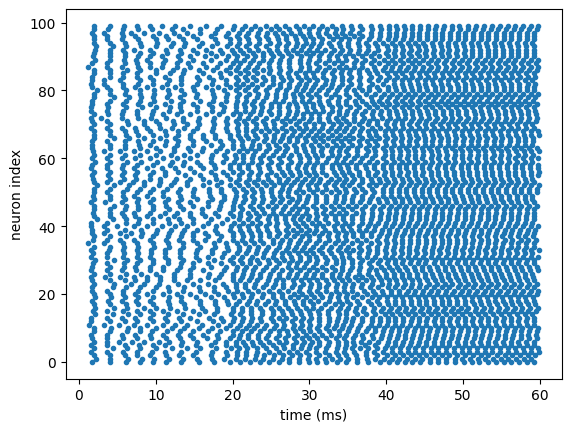

In [46]:
#plotting spiking behaviour
b2t.brian_plot(spm)

<Axes: xlabel='time (ms)', ylabel='v'>

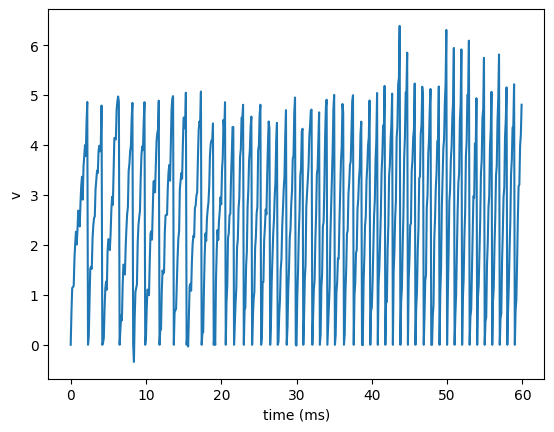

In [47]:
#potting voltage changes (received stimulus from dataset)
b2t.brian_plot(Mv)

<Axes: xlabel='time (ms)', ylabel='v'>

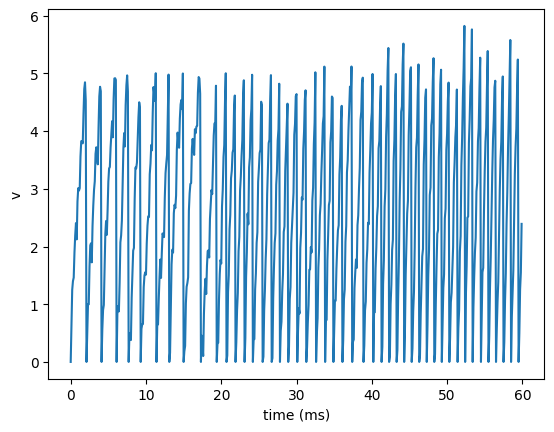

In [48]:
b2t.brian_plot(Mv1)

In [49]:
#printing execution time
execution_time=end-start
print(execution_time)

0.5702028274536133


In [50]:
#calculating number of weight changes - exact number cannot be calculated as synaptic connection are based on probability
count=0
m=0
for n in range (len(M.w[m])-1) :
    if M.w[m][n]!=M.w[m][n+1] :
        count+=1
print(count)

84
